# Machine Learning Model Prediction





## Data Preparation

### Required Specific Libraries

In [170]:
# Import necessary libraries
import numpy as np

import pandas as pd

import matplotlib.pyplot as matplt
from matplotlib import rcParams
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Import data preprocessing libraries and models
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.compose import make_column_transformer
from imblearn.over_sampling import SMOTE

# Import model evaluation and training utilities
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,ConfusionMatrixDisplay, accuracy_score, confusion_matrix, precision_score, recall_score

# Import machine learning models
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [171]:
# Mount Google Drive to access datasets
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import dataset

In [172]:
# Load the dataset into a DataFrame
dataframe = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Exam/LA4PSchools.csv')

In [173]:
dataframe.head()

,StudentID,Gender,Year_02,Kinder_Age,Disability,NCCD-Funded,01.SES,02.SES,NumSibling,SiblingOrder,...,HRSIW-01-SOY,Counting-01,Counting-02,Place Value-01,Place Value-02,Addition and Subtraction-01,Addition and Subtraction-02,Multiplication and Division-01,Multiplication and Division-02,Year3_Writing_At_Risk
0,SN35433053,Male,2020,5.5,Disability_Non-disable,0,104,104,3,3,...,49,4,5,2,2,2,4,2,2,False
1,SN71277215,Female,2018,5.8,Disability_Non-disable,0,112,112,2,2,...,37,2,1,1,1,2,3,0,2,False
2,SN40883127,Male,2021,5.9,Disability_Non-disable,0,120,109,2,2,...,30,2,1,1,2,2,1,2,1,False
3,SN93063777,Male,2021,5.7,Disability_Non-disable,0,95,93,2,1,...,30,2,3,1,2,1,5,2,2,False
4,SN84195329,Male,2021,5.8,Disability_Non-disable,0,98,98,1,1,...,32,2,4,2,2,2,4,1,1,True


In [174]:
dataframe.tail()

,StudentID,Gender,Year_02,Kinder_Age,Disability,NCCD-Funded,01.SES,02.SES,NumSibling,SiblingOrder,...,HRSIW-01-SOY,Counting-01,Counting-02,Place Value-01,Place Value-02,Addition and Subtraction-01,Addition and Subtraction-02,Multiplication and Division-01,Multiplication and Division-02,Year3_Writing_At_Risk
1995,SN72182891,Female,2016,4.9,Disability_Cognitive,0,114,114,2,1,...,32,1,3,0,2,0,2,0,2,False
1996,SN69853705,Female,2021,4.6,Disability_Non-disable,0,95,93,1,1,...,45,2,1,1,1,1,3,2,2,False
1997,SN64915269,Male,2016,5.7,Disability_Non-disable,0,101,101,3,2,...,33,1,3,1,2,2,2,0,2,False
1998,SN70943748,Female,2021,5.4,Disability_Non-disable,0,117,108,3,1,...,35,2,2,1,2,1,4,1,2,False
1999,SN70826435,Male,2017,5.6,Disability_Cognitive,0,95,95,2,2,...,19,2,2,1,4,1,2,2,4,True


In [175]:
print('No of tuples: ', dataframe.shape[0],'| No of features: ',dataframe.shape[1])

No of tuples:  2000 | No of features:  34


In [176]:
dataframe.describe()

,Year_02,Kinder_Age,NCCD-Funded,01.SES,02.SES,NumSibling,SiblingOrder,NumAbvYear9,NumAbvDiploma,NumProf,...,WritingVocab-01-SOY,HRSIW-01-SOY,Counting-01,Counting-02,Place Value-01,Place Value-02,Addition and Subtraction-01,Addition and Subtraction-02,Multiplication and Division-01,Multiplication and Division-02
count,2000.000000,2000.000000,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,2018.640000,5.276400,0.089000,102.9415,102.117500,2.356500,1.748500,1.564000,0.886500,0.766500,...,22.018500,30.508000,1.758000,2.850500,1.028500,1.681500,1.290500,2.257500,1.075500,1.797500
std,1.664568,0.348129,0.284815,9.3859,9.150167,0.993932,0.865229,0.725374,0.837836,0.811977,...,12.679098,10.020686,0.935881,1.072719,0.529932,0.639736,0.935172,1.155795,0.837944,0.771875
min,2016.000000,4.500000,0.000000,78.0000,78.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,-3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2017.000000,5.000000,0.000000,95.0000,95.000000,2.000000,1.000000,1.000000,0.000000,0.000000,...,13.000000,25.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,0.000000,2.000000
50%,2018.000000,5.300000,0.000000,101.0000,101.000000,2.000000,2.000000,2.000000,1.000000,1.000000,...,20.000000,32.000000,2.000000,3.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000
75%,2020.000000,5.500000,0.000000,113.0000,109.000000,3.000000,2.000000,2.000000,2.000000,1.000000,...,29.000000,37.000000,2.000000,4.000000,1.000000,2.000000,2.000000,3.000000,2.000000,2.000000
max,2021.000000,6.500000,1.000000,120.0000,120.000000,7.000000,6.000000,3.000000,2.000000,2.000000,...,95.000000,58.000000,5.000000,6.000000,4.000000,5.000000,5.000000,6.000000,4.000000,5.000000


In [177]:
# add targat variable as a boolean
dataframe['Year3_Writing_At_Risk'] = dataframe['Year3_Writing_At_Risk'].map({False: 0, True: 1})

In [178]:
dataframe.describe(include=["O"])

,StudentID,Gender,Disability
count,2000,2000,2000
unique,2000,2,5
top,SN35433053,Male,Disability_Non-disable
freq,1,1018,1381


array([[<Axes: title={'center': 'Year_02'}>,
        <Axes: title={'center': 'Kinder_Age'}>,
        <Axes: title={'center': 'NCCD-Funded'}>,
        <Axes: title={'center': '01.SES'}>],
       [<Axes: title={'center': '02.SES'}>,
        <Axes: title={'center': 'NumSibling'}>,
        <Axes: title={'center': 'SiblingOrder'}>,
        <Axes: title={'center': 'NumAbvYear9'}>],
       [<Axes: title={'center': 'NumAbvDiploma'}>,
        <Axes: title={'center': 'NumProf'}>,
        <Axes: title={'center': 'Burt-01-SOY'}>,
        <Axes: title={'center': 'Counting-01'}>],
       [<Axes: title={'center': 'Counting-02'}>,
        <Axes: title={'center': 'Place Value-01'}>,
        <Axes: title={'center': 'Place Value-02'}>,
        <Axes: title={'center': 'Addition and Subtraction-01'}>],
       [<Axes: title={'center': 'Addition and Subtraction-02'}>,
        <Axes: title={'center': 'Multiplication and Division-01'}>,
        <Axes: title={'center': 'Multiplication and Division-02'}>,
      

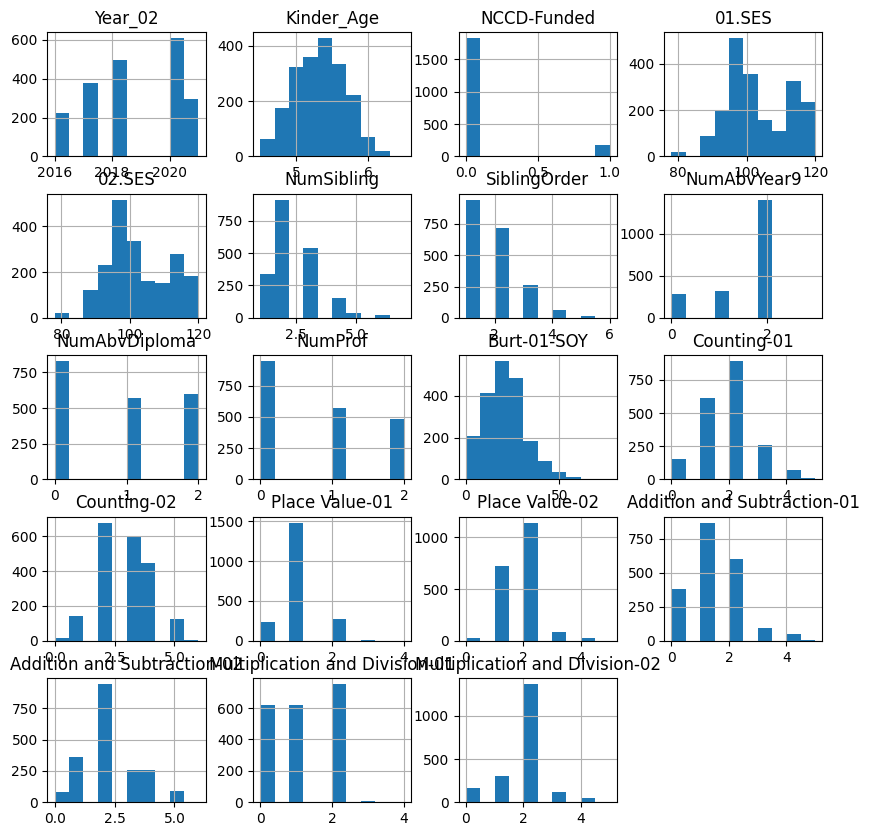

In [179]:
rcParams['figure.figsize'] = 10, 10
dataframe[['Year_02', 'Kinder_Age', 'NCCD-Funded', '01.SES', "02.SES", "NumSibling", "SiblingOrder", "NumAbvYear9", "NumAbvDiploma", "NumProf", "Burt-01-SOY", "Counting-01", "Counting-02", "Place Value-01", "Place Value-02", "Addition and Subtraction-01", "Addition and Subtraction-02", "Multiplication and Division-01", "Multiplication and Division-02"]].hist()

array([[<Axes: title={'center': 'Burt-01-EOY'}>,
        <Axes: title={'center': 'Clay-01-SOY'}>,
        <Axes: title={'center': 'Clay-01-EOY'}>],
       [<Axes: title={'center': 'TextLevel-01-SOY'}>,
        <Axes: title={'center': 'TextLevel-01-MOY'}>,
        <Axes: title={'center': 'TextLevel-01-EOY'}>],
       [<Axes: title={'center': 'TextLevel-02-SOY'}>,
        <Axes: title={'center': 'TextLevel-02-MOY'}>,
        <Axes: title={'center': 'TextLevel-02-EOY'}>],
       [<Axes: title={'center': 'WritingVocab-01-SOY'}>,
        <Axes: title={'center': 'Burt-01-SOY'}>,
        <Axes: title={'center': 'HRSIW-01-SOY'}>]], dtype=object)

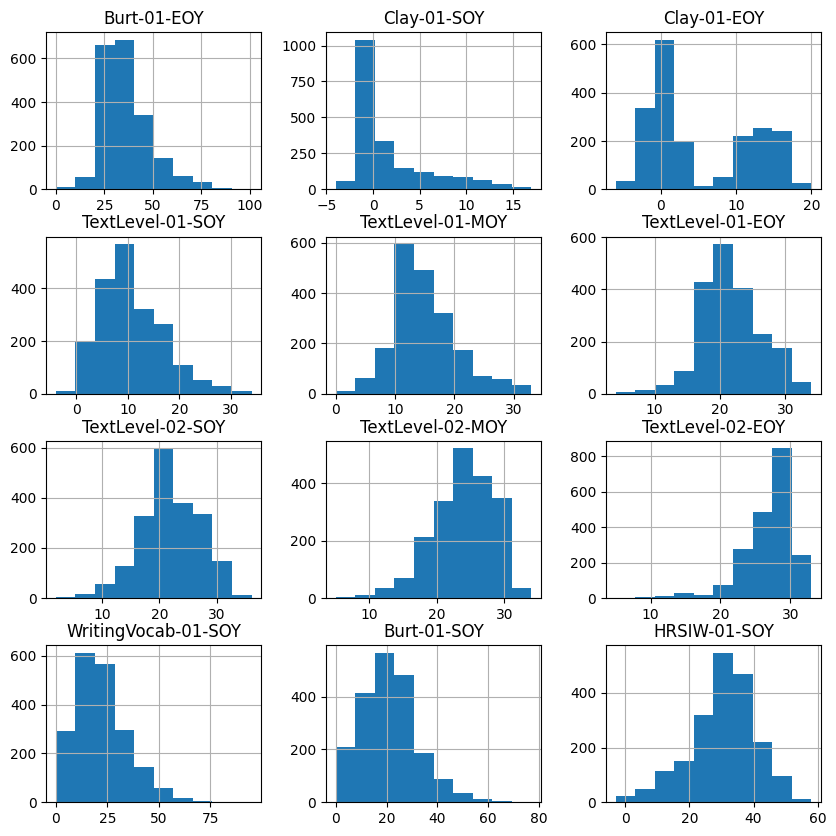

In [180]:
rcParams['figure.figsize'] = 10, 10
dataframe[['Burt-01-EOY', 'Clay-01-SOY', 'Clay-01-EOY', 'TextLevel-01-SOY', "TextLevel-01-MOY", "TextLevel-01-EOY", "TextLevel-02-SOY", "TextLevel-02-MOY", "TextLevel-02-EOY", "WritingVocab-01-SOY", "Burt-01-SOY", "HRSIW-01-SOY"]].hist()

In [181]:
print(dataframe.dtypes)

StudentID                          object
Gender                             object
Year_02                             int64
Kinder_Age                        float64
Disability                         object
NCCD-Funded                         int64
01.SES                              int64
02.SES                              int64
NumSibling                          int64
SiblingOrder                        int64
NumAbvYear9                         int64
NumAbvDiploma                       int64
NumProf                             int64
Burt-01-SOY                         int64
Burt-01-EOY                         int64
Clay-01-SOY                         int64
Clay-01-EOY                         int64
TextLevel-01-SOY                    int64
TextLevel-01-MOY                    int64
TextLevel-01-EOY                    int64
TextLevel-02-SOY                    int64
TextLevel-02-MOY                    int64
TextLevel-02-EOY                    int64
WritingVocab-01-SOY               

In [182]:
numeric_df = dataframe.select_dtypes(exclude=['object'])

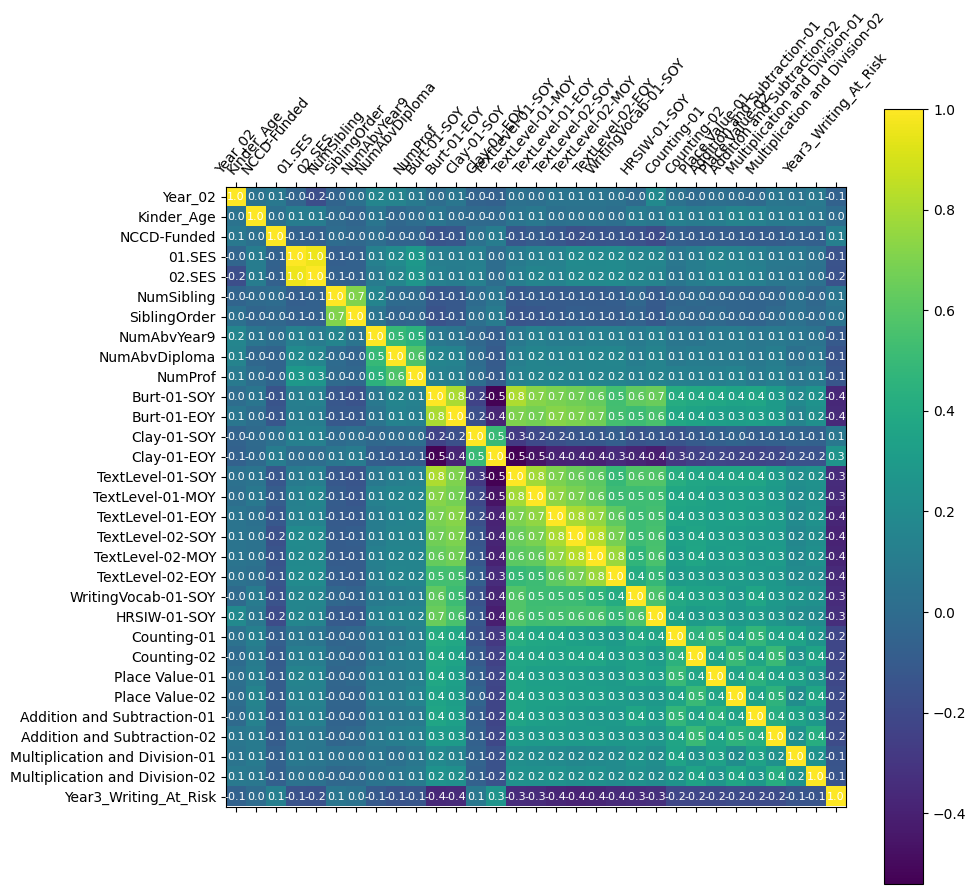

In [183]:
# Create correlation matrix plot for numeric features
fig = matplt.figure(figsize=(10, 10))

matplt.matshow(numeric_df.corr(),fignum=fig.number) # Correlation heatmap
matplt.colorbar()
matplt.xticks(np.arange(len(numeric_df.corr().columns)), numeric_df.corr().columns.values, rotation = 50)
matplt.yticks(np.arange(len(numeric_df.corr().columns)), numeric_df.corr().columns.values)

# Show correlation values inside the matrix
for (i, j), corr in np.ndenumerate(numeric_df.corr()):
    matplt.text(j, i, '{:0.1f}'.format(corr), ha='center', va='center', color='white', fontsize=8)

## Preprocess the data

Dropping unnecessary data

In [184]:
# Drop 'StudentID' column since it's not useful for the model
dataframe.drop(["StudentID"],axis=1,inplace=True)

In [185]:
dataframe.shape

(2000, 33)

Outlier Removals

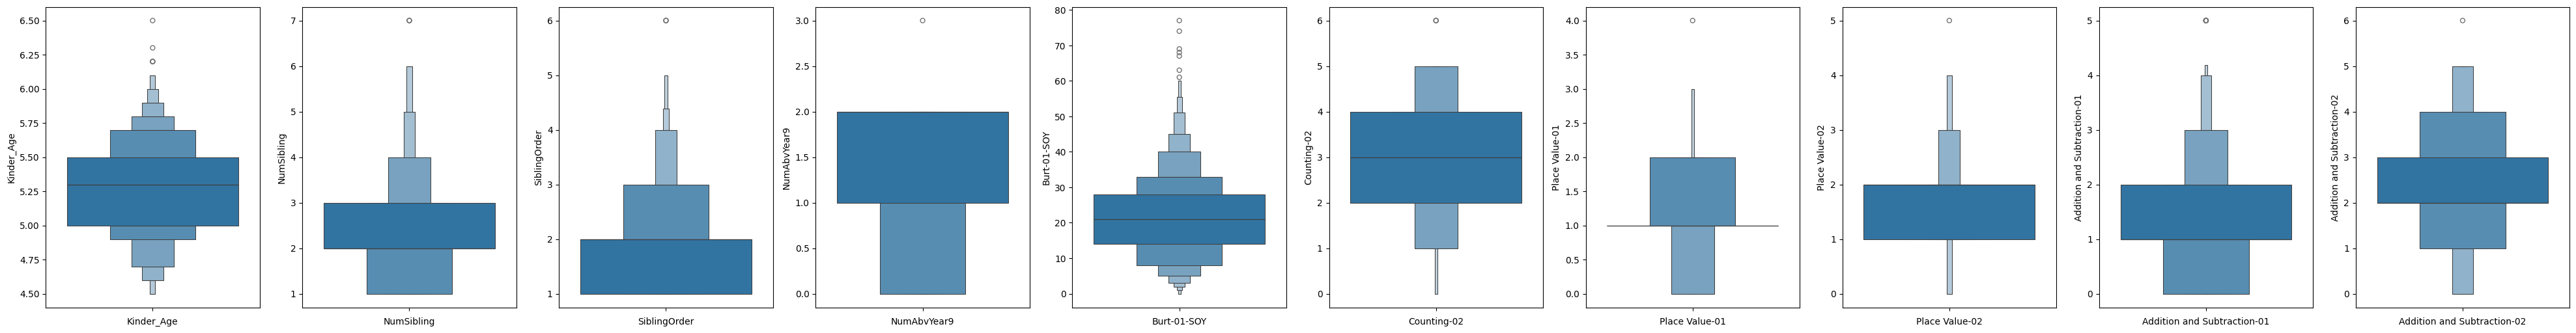

In [186]:
# Boxenplot visualization for selected columns to identify outliers
colomns = ['Kinder_Age', "NumSibling", "SiblingOrder", "NumAbvYear9", "Burt-01-SOY", "Counting-02", "Place Value-01", "Place Value-02", "Addition and Subtraction-01", "Addition and Subtraction-02"]

figure, ax = matplt.subplots(ncols=len(colomns), figsize=(5 * len(colomns),6), sharex = True)

for r in range(len(colomns)):
  (sns.boxenplot(y=dataframe[colomns[r]],data=dataframe, showfliers=True,ax=ax[r])).set(xlabel=colomns[r])

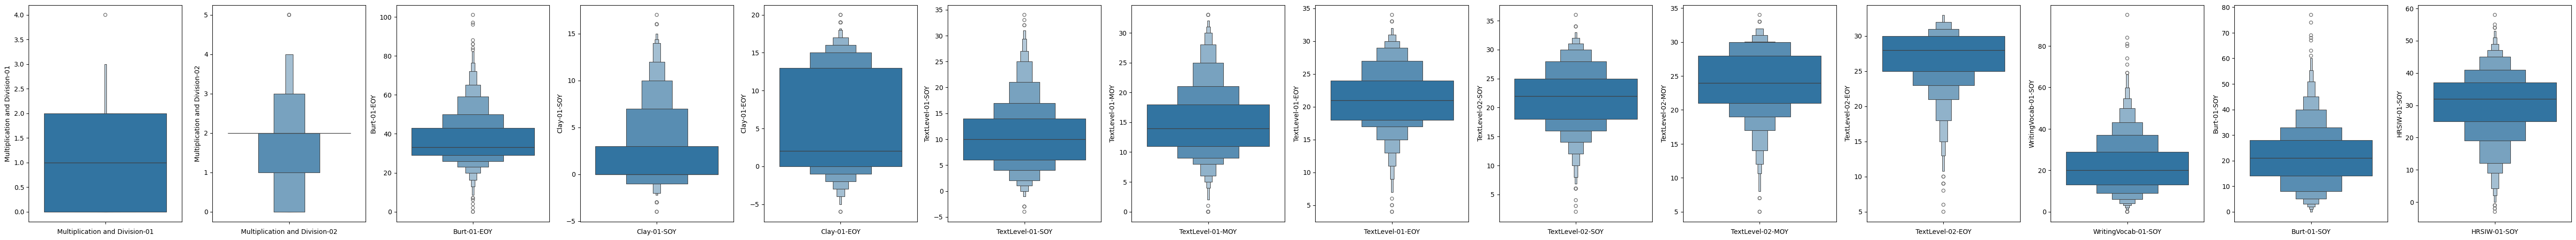

In [187]:
# Boxenplot visualization for selected columns to identify outliers
colomns = ["Multiplication and Division-01", "Multiplication and Division-02",'Burt-01-EOY', 'Clay-01-SOY', 'Clay-01-EOY', 'TextLevel-01-SOY', "TextLevel-01-MOY", "TextLevel-01-EOY", "TextLevel-02-SOY", "TextLevel-02-MOY", "TextLevel-02-EOY", "WritingVocab-01-SOY", "Burt-01-SOY", "HRSIW-01-SOY"]

figure, ax = matplt.subplots(ncols=len(colomns), figsize=(5 * len(colomns),6), sharex = True)

for r in range(len(colomns)):
  (sns.boxenplot(y=dataframe[colomns[r]],data=dataframe, showfliers=True,ax=ax[r])).set(xlabel=colomns[r])

## For Encoding Categorical data

In [188]:
dataframe.describe(include=['object'])

,Gender,Disability
count,2000,2000
unique,2,5
top,Male,Disability_Non-disable
freq,1018,1381


In [189]:
print(dataframe.dtypes)

Gender                             object
Year_02                             int64
Kinder_Age                        float64
Disability                         object
NCCD-Funded                         int64
01.SES                              int64
02.SES                              int64
NumSibling                          int64
SiblingOrder                        int64
NumAbvYear9                         int64
NumAbvDiploma                       int64
NumProf                             int64
Burt-01-SOY                         int64
Burt-01-EOY                         int64
Clay-01-SOY                         int64
Clay-01-EOY                         int64
TextLevel-01-SOY                    int64
TextLevel-01-MOY                    int64
TextLevel-01-EOY                    int64
TextLevel-02-SOY                    int64
TextLevel-02-MOY                    int64
TextLevel-02-EOY                    int64
WritingVocab-01-SOY                 int64
HRSIW-01-SOY                      

In [190]:
for d in dataframe.select_dtypes(include = 'object'):
    print(dataframe[d].value_counts())
    print("")

Gender
Male      1018
Female     982
Name: count, dtype: int64

Disability
Disability_Non-disable        1381
Disability_Cognitive           469
Disability_SocialEmotional      73
Disability_Physical             67
Disability_Sensory              10
Name: count, dtype: int64



In [191]:
# Data transformation: replace categorical values for 'Gender'
change_values = {
  'Gender': {
    'Male': 0,
    'Female': 1
  }
}

dataframe.replace(change_values, inplace=True)

In [192]:
dataframe.head()

,Gender,Year_02,Kinder_Age,Disability,NCCD-Funded,01.SES,02.SES,NumSibling,SiblingOrder,NumAbvYear9,...,HRSIW-01-SOY,Counting-01,Counting-02,Place Value-01,Place Value-02,Addition and Subtraction-01,Addition and Subtraction-02,Multiplication and Division-01,Multiplication and Division-02,Year3_Writing_At_Risk
0,0,2020,5.5,Disability_Non-disable,0,104,104,3,3,2,...,49,4,5,2,2,2,4,2,2,0
1,1,2018,5.8,Disability_Non-disable,0,112,112,2,2,2,...,37,2,1,1,1,2,3,0,2,0
2,0,2021,5.9,Disability_Non-disable,0,120,109,2,2,2,...,30,2,1,1,2,2,1,2,1,0
3,0,2021,5.7,Disability_Non-disable,0,95,93,2,1,0,...,30,2,3,1,2,1,5,2,2,0
4,0,2021,5.8,Disability_Non-disable,0,98,98,1,1,2,...,32,2,4,2,2,2,4,1,1,1


In [193]:
print(dataframe.dtypes)

Gender                              int64
Year_02                             int64
Kinder_Age                        float64
Disability                         object
NCCD-Funded                         int64
01.SES                              int64
02.SES                              int64
NumSibling                          int64
SiblingOrder                        int64
NumAbvYear9                         int64
NumAbvDiploma                       int64
NumProf                             int64
Burt-01-SOY                         int64
Burt-01-EOY                         int64
Clay-01-SOY                         int64
Clay-01-EOY                         int64
TextLevel-01-SOY                    int64
TextLevel-01-MOY                    int64
TextLevel-01-EOY                    int64
TextLevel-02-SOY                    int64
TextLevel-02-MOY                    int64
TextLevel-02-EOY                    int64
WritingVocab-01-SOY                 int64
HRSIW-01-SOY                      

In [194]:
dataframe_copy = dataframe

In [195]:
# One-Hot Encode 'Disability' feature and merge with the original dataframe
disability_transformer = make_column_transformer(
  (OneHotEncoder(), ['Disability']),
  remainder='passthrough',
  verbose_feature_names_out=False
)

dataframe = dataframe_copy

disability_transformed = disability_transformer.fit_transform(dataframe)
dataframe = pd.DataFrame(disability_transformed, columns=disability_transformer.get_feature_names_out())
dataframe.head(20)

,Disability_Disability_Cognitive,Disability_Disability_Non-disable,Disability_Disability_Physical,Disability_Disability_Sensory,Disability_Disability_SocialEmotional,Gender,Year_02,Kinder_Age,NCCD-Funded,01.SES,...,HRSIW-01-SOY,Counting-01,Counting-02,Place Value-01,Place Value-02,Addition and Subtraction-01,Addition and Subtraction-02,Multiplication and Division-01,Multiplication and Division-02,Year3_Writing_At_Risk
0,0.0,1.0,0.0,0.0,0.0,0.0,2020.0,5.5,0.0,104.0,...,49.0,4.0,5.0,2.0,2.0,2.0,4.0,2.0,2.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,2018.0,5.8,0.0,112.0,...,37.0,2.0,1.0,1.0,1.0,2.0,3.0,0.0,2.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,2021.0,5.9,0.0,120.0,...,30.0,2.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,2021.0,5.7,0.0,95.0,...,30.0,2.0,3.0,1.0,2.0,1.0,5.0,2.0,2.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,2021.0,5.8,0.0,98.0,...,32.0,2.0,4.0,2.0,2.0,2.0,4.0,1.0,1.0,1.0
5,0.0,1.0,0.0,0.0,0.0,1.0,2016.0,5.3,0.0,104.0,...,40.0,2.0,4.0,2.0,2.0,1.0,2.0,1.0,3.0,1.0
6,0.0,1.0,0.0,0.0,0.0,0.0,2020.0,5.1,0.0,110.0,...,51.0,2.0,2.0,1.0,1.0,0.0,2.0,0.0,2.0,0.0
7,0.0,1.0,0.0,0.0,0.0,1.0,2020.0,5.6,0.0,109.0,...,28.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
8,0.0,1.0,0.0,0.0,0.0,1.0,2016.0,5.6,0.0,120.0,...,39.0,1.0,5.0,1.0,2.0,2.0,2.0,2.0,2.0,0.0
9,0.0,1.0,0.0,0.0,0.0,1.0,2020.0,4.9,0.0,107.0,...,16.0,0.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [196]:
dataframe.shape

(2000, 37)

In [197]:
print(dataframe.dtypes)

Disability_Disability_Cognitive          float64
Disability_Disability_Non-disable        float64
Disability_Disability_Physical           float64
Disability_Disability_Sensory            float64
Disability_Disability_SocialEmotional    float64
Gender                                   float64
Year_02                                  float64
Kinder_Age                               float64
NCCD-Funded                              float64
01.SES                                   float64
02.SES                                   float64
NumSibling                               float64
SiblingOrder                             float64
NumAbvYear9                              float64
NumAbvDiploma                            float64
NumProf                                  float64
Burt-01-SOY                              float64
Burt-01-EOY                              float64
Clay-01-SOY                              float64
Clay-01-EOY                              float64
TextLevel-01-SOY    

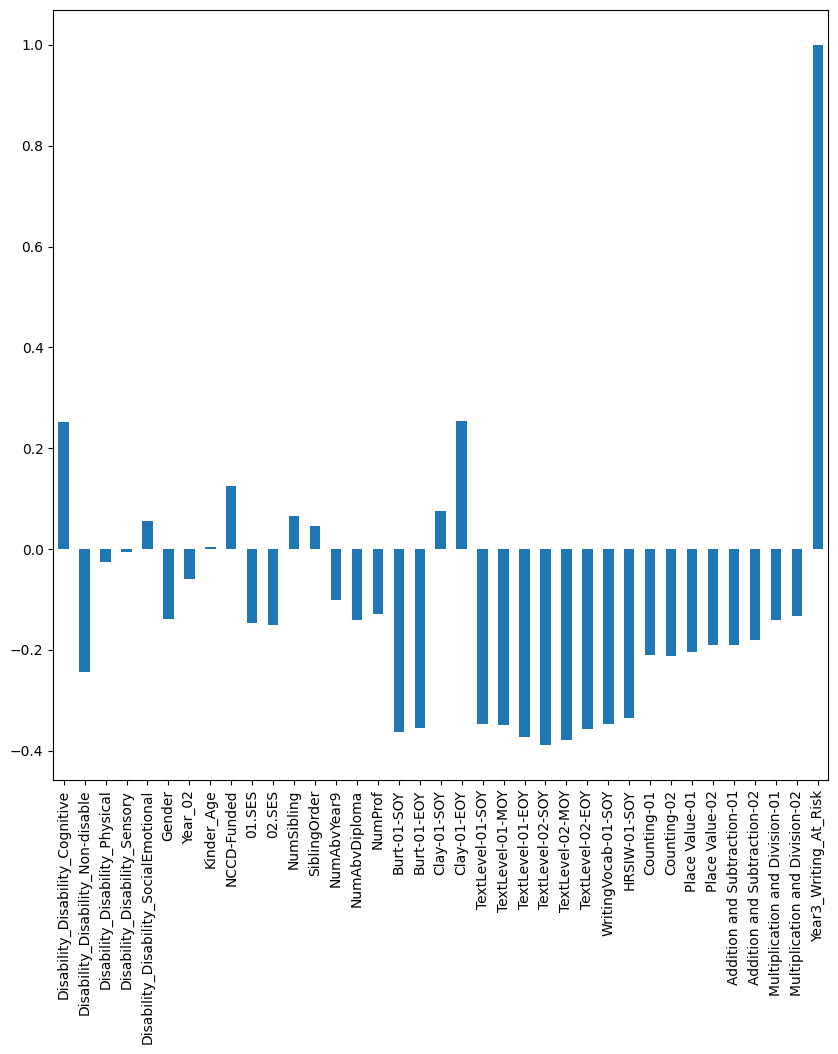

In [198]:
# Visualize correlations between features and the target variable 'Year3_Writing_At_Risk'
cor_relation=dataframe.corrwith(dataframe["Year3_Writing_At_Risk"])
cor_relation.plot(kind='bar')
matplt.show()

# Model Training

In [199]:
# Split features and target for modeling
depent_axis = dataframe["Year3_Writing_At_Risk"]
independent_axis = dataframe.drop(["Year3_Writing_At_Risk"],axis=1)

## Scaling Dataset from Standardize

In [200]:
# Standardize the features for better model performance
scaler = StandardScaler()
independent_axis = scaler.fit_transform(independent_axis)
independent_axis

array([[-0.55347604,  0.66949677, -0.18617505, ...,  1.50799757,
         1.10357108,  0.26241365],
       [-0.55347604,  0.66949677, -0.18617505, ...,  0.64257572,
        -1.28381903,  0.26241365],
       [-0.55347604,  0.66949677, -0.18617505, ..., -1.08826797,
         1.10357108, -1.03345623],
       ...,
       [-0.55347604,  0.66949677, -0.18617505, ..., -0.22284613,
        -1.28381903,  0.26241365],
       [-0.55347604,  0.66949677, -0.18617505, ...,  1.50799757,
        -0.09012398,  0.26241365],
       [ 1.80676294, -1.49365919, -0.18617505, ..., -0.22284613,
         1.10357108,  2.85415341]])

## Split dataset into training and test sets

<Axes: xlabel='Year3_Writing_At_Risk', ylabel='count'>

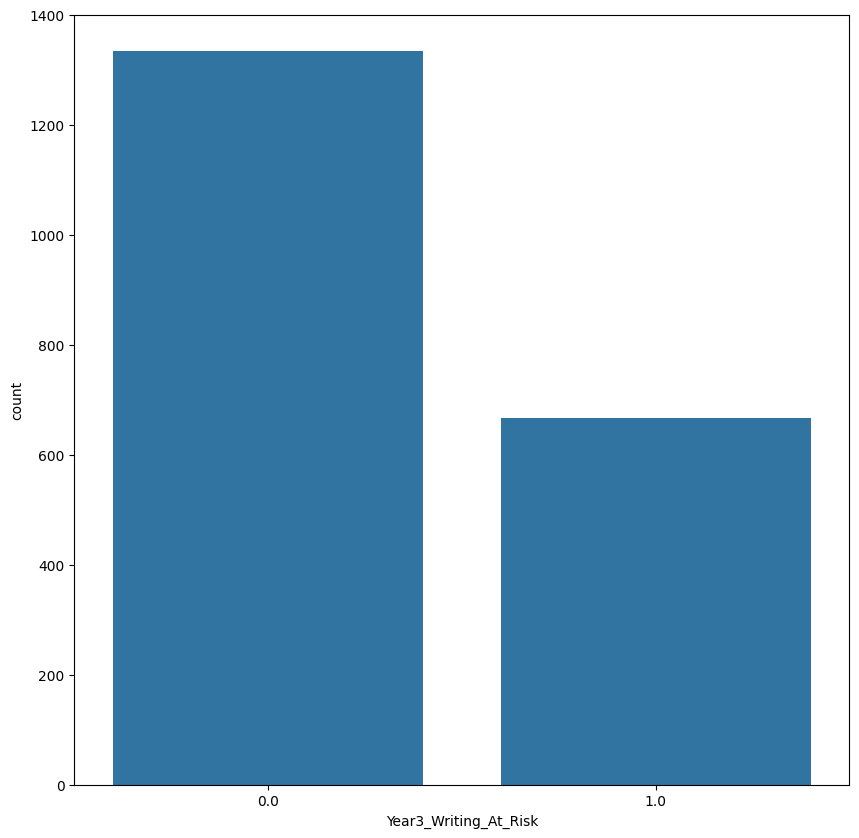

In [201]:
sns.countplot(x='Year3_Writing_At_Risk',data=dataframe)

In [202]:
dataframe['Year3_Writing_At_Risk'].value_counts()

print("Presentage of people stroking = ")
len(dataframe[dataframe['Year3_Writing_At_Risk'] == 1])/len(dataframe)*100

Presentage of people stroking = 


33.300000000000004

<Axes: xlabel='Year3_Writing_At_Risk', ylabel='count'>

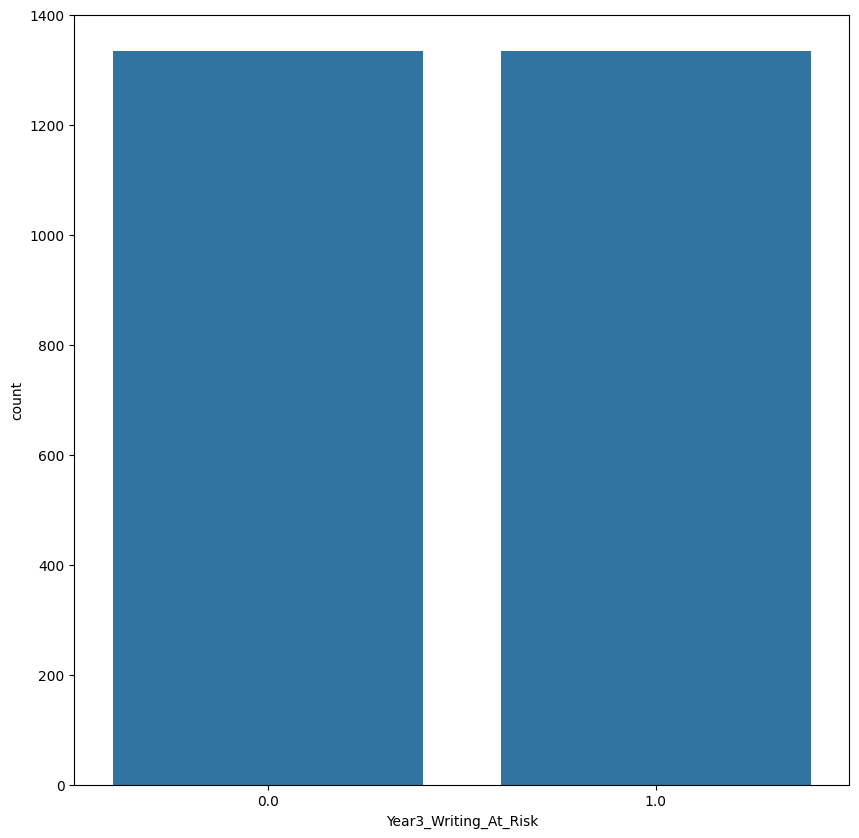

In [203]:
# Balance the target classes using SMOTE (Synthetic Minority Over-sampling)
independent_axis, depent_axis = SMOTE().fit_resample(independent_axis, depent_axis)

sns.countplot(x=depent_axis, data=dataframe)

## Split dataset into training and test sets

In [204]:
# Split data into training and testing sets
x_train,x_test,y_train,y_test = train_test_split(independent_axis,depent_axis,test_size=0.2,random_state=42)

# RandomForest Classifier

In [205]:
best_model = RandomForestClassifier(
    max_depth=30,
    max_features='sqrt',
    min_samples_leaf=2,
    min_samples_split=5,
    n_estimators=100,
    random_state=42,
    bootstrap=False
)

In [206]:
best_model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=30, min_samples_leaf=2,
                       min_samples_split=5, random_state=42)

Presentage of Random Forest Classifier scores
Random Forest Classifier Model accuracy	: 0.8202247191011236
Presentage	: 82.0%
              precision    recall  f1-score   support

         0.0       0.82      0.84      0.83       279
         1.0       0.82      0.80      0.81       255

    accuracy                           0.82       534
   macro avg       0.82      0.82      0.82       534
weighted avg       0.82      0.82      0.82       534

Confusion Matrix:


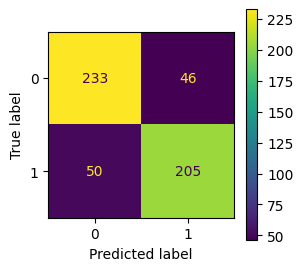

In [207]:
y_pred = best_model.predict(x_test)

r_accuracy = best_model.score(x_test, y_test)

cm = confusion_matrix(y_test, y_pred)

print('Presentage of Random Forest Classifier scores')
print(f'Random Forest Classifier Model accuracy\t: {r_accuracy}')
print(f'Presentage\t: {"{:.1%}".format(r_accuracy)}')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
cmd = ConfusionMatrixDisplay(confusion_matrix=cm)

fig, ax = matplt.subplots(figsize=(3, 3))
cmd.plot(ax=ax)
matplt.show()

## Save Random ForestClassifier best model



In [208]:
# Save the model as a pickle file
import pickle
model_filename = '/content/drive/My Drive/Colab Notebooks/Exam/random_forest_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(best_model, file)

print(f'Model saved as {model_filename}')

Model saved as /content/drive/My Drive/Colab Notebooks/Exam/random_forest_model.pkl


# Support Vector Classifier

Presentage of Support vector Classifier scores
 Support vector Classifier Model accuracy	: 0.7471910112359551
Presentage	: 74.7%
              precision    recall  f1-score   support

         0.0       0.76      0.75      0.76       279
         1.0       0.73      0.75      0.74       255

    accuracy                           0.75       534
   macro avg       0.75      0.75      0.75       534
weighted avg       0.75      0.75      0.75       534

Confusion Matrix - 


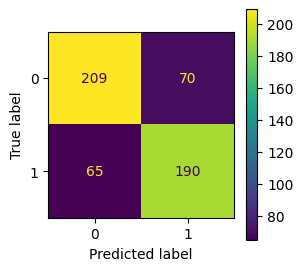

In [209]:
model = SVC()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

s_accuracy = model.score(x_test, y_test)

y_pred = model.predict(x_test)

cm = confusion_matrix(y_test, y_pred)

print('Presentage of Support vector Classifier scores')
print(f' Support vector Classifier Model accuracy\t: {s_accuracy}')
print(f'Presentage\t: {"{:.1%}".format(s_accuracy)}')
print(classification_report(y_test, y_pred))

print('Confusion Matrix - ')
cmd = ConfusionMatrixDisplay(confusion_matrix=cm);
figure, ax = matplt.subplots(figsize=(3,3))
cmd.plot(ax=ax)

# Decision Tree Classifier

Decision Tree scores
Decision Tree Model accuracy	: 0.7265917602996255
Presentage	: 72.7%
              precision    recall  f1-score   support

         0.0       0.75      0.72      0.73       279
         1.0       0.70      0.74      0.72       255

    accuracy                           0.73       534
   macro avg       0.73      0.73      0.73       534
weighted avg       0.73      0.73      0.73       534

Confusion Matrix - 
[[200  79]
 [ 67 188]]
Confusion Matrix - 


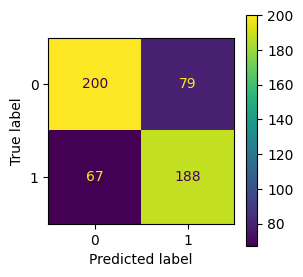

In [210]:
model = DecisionTreeClassifier()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

d_accuracy = model.score(x_test, y_test)

cm = confusion_matrix(y_test, y_pred)

print('Decision Tree scores')
print(f'Decision Tree Model accuracy\t: {d_accuracy}')
print(f'Presentage\t: {"{:.1%}".format(d_accuracy)}')
print(classification_report(y_test, y_pred))

print('Confusion Matrix - ')
print(confusion_matrix(y_test, y_pred))

print('Confusion Matrix - ')
cmd = ConfusionMatrixDisplay(confusion_matrix=cm);
figure, ax = matplt.subplots(figsize=(3,3))
cmd.plot(ax=ax)

# Logistic Regression

Logistic Regression scores
Logistic Regression Model accuracy	: 0.6928838951310862
Percentage	: 69.3%
              precision    recall  f1-score   support

         0.0       0.71      0.71      0.71       279
         1.0       0.68      0.68      0.68       255

    accuracy                           0.69       534
   macro avg       0.69      0.69      0.69       534
weighted avg       0.69      0.69      0.69       534

Confusion Matrix - 
[[197  82]
 [ 82 173]]
Confusion Matrix - 


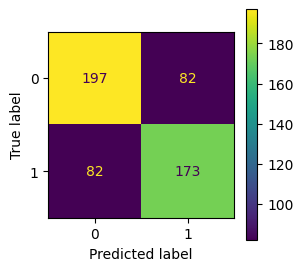

In [211]:
model = LogisticRegression()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

l_accuracy = model.score(x_test, y_test)

cm = confusion_matrix(y_test, y_pred)

print('Logistic Regression scores')
print(f'Logistic Regression Model accuracy\t: {l_accuracy}')
print(f'Percentage\t: {"{:.1%}".format(l_accuracy)}')
print(classification_report(y_test, y_pred))

print('Confusion Matrix - ')
print(confusion_matrix(y_test, y_pred))

print('Confusion Matrix - ')
cmd = ConfusionMatrixDisplay(confusion_matrix=cm);
figure, ax = matplt.subplots(figsize=(3,3))
cmd.plot(ax=ax)

# Visualize model accuracies

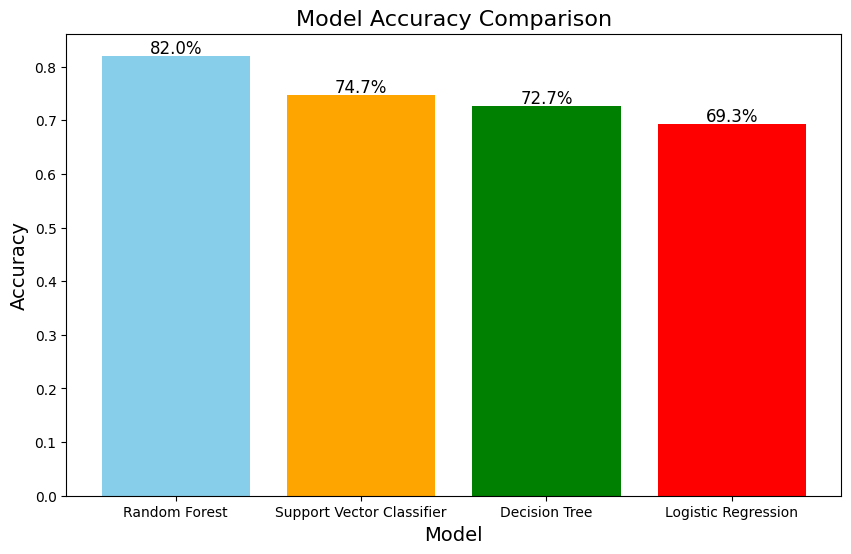

In [212]:
import pandas as pd
import matplotlib.pyplot as plt

model_accuracies = {
    'Random Forest': r_accuracy,
    'Support Vector Classifier': s_accuracy,
    'Decision Tree': d_accuracy,
    'Logistic Regression': l_accuracy
}

df = pd.DataFrame(list(model_accuracies.items()), columns=['Model', 'Accuracy'])

plt.figure(figsize=(10, 6))
plt.bar(df['Model'], df['Accuracy'], color=['skyblue', 'orange', 'green', 'red'])

plt.title('Model Accuracy Comparison', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)

for index, value in enumerate(df['Accuracy']):
    plt.text(index, value + 0.005, "{:.1%}".format(value), ha='center', fontsize=12)

plt.show()


In [213]:
# Step 1: Load the model
model_filename = '/content/drive/My Drive/Colab Notebooks/Exam/random_forest_model.pkl'
with open(model_filename, 'rb') as file:
    loaded_model = pickle.load(file)

In [214]:
old_dataframe = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Exam/LA4PSchools.csv')

In [215]:
copy_old_dataframe = old_dataframe

In [216]:
# Ensure the data has the same preprocessing as before
# Dropping unnecessary columns
old_dataframe.drop(["StudentID"], axis=1, inplace=True)

In [217]:
change_values = {
  'Gender': {
    'Male': 0,
    'Female': 1
  }
}

old_dataframe.replace(change_values, inplace=True)

In [218]:
# Receive backup of dataframe to maintain idempotency of the following cell
old_dataframe_copy = old_dataframe

In [219]:
# OneHot encoding for categorical columns
disability_transformer = make_column_transformer(
    (OneHotEncoder(), ['Disability']),
    remainder='passthrough',
    verbose_feature_names_out=False
)

old_dataframe = old_dataframe_copy

In [220]:
work_type_transformed = disability_transformer.fit_transform(old_dataframe)
old_dataframe = pd.DataFrame(work_type_transformed, columns=disability_transformer.get_feature_names_out())

In [221]:
# Splitting the data into features (X) and target (y)
X_old_data = old_dataframe.drop(["Year3_Writing_At_Risk"], axis=1)
y_old_data = old_dataframe["Year3_Writing_At_Risk"]

In [222]:
# Data scaling
scaler = StandardScaler()
X_old_data_scaled = scaler.fit_transform(X_old_data)

In [223]:
# Step 3: Predict using the loaded model
predicted_ratings = loaded_model.predict(X_old_data_scaled)

In [224]:
# Step 4: Add the predicted ratings to the original DataFrame
copy_old_dataframe['Predicted_Average_Rating'] = predicted_ratings

In [225]:
# Save the updated DataFrame to a new CSV file
new_csv_filename = '/content/drive/My Drive/Colab Notebooks/Exam/Exam_predictions.csv'
copy_old_dataframe.to_csv(new_csv_filename, index=False)
print(f'Updated CSV with predictions saved to {new_csv_filename}')

Updated CSV with predictions saved to /content/drive/My Drive/Colab Notebooks/Exam/Exam_predictions.csv
